# ANLY 590 Assignment 2

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


## 1 Feedforward: Building a ReLU neural network
Consider the rectified linear activation function : hj = max(0, aj ).

1.1 Draw a network with:

<img src="open_HZndGpFI.txt">

1.2 Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

$$
\begin{aligned}
h_i &= ReLu(w_{1i}x_1 + w_{2i}x_2+ b_i) \\
\hat y &= \sigma (v_ih_i + c_i) \\
\hat y &= \sigma (v_1ReLu(w_{11}x_1 + w_{21}x_2 + b_1) \\
&+ v_2ReLu(w_{12}x_1 + w_{22}x_2 + b_2) \\
&+ v_3ReLu(w_{13}x_1 + w_{23}x_2 + b_3) + c)
\end{aligned}
$$

1.3 Write out the forward-pass function in python, call it ff_nn_ReLu(...)

In [2]:
# Define activation functions: ReLu and Sigmoid
def ReLu(x):  
    return np.maximum(0, x)

def sigmoid(h):
    sigmoid = 1/(1+ np.exp(-h))
    return sigmoid

# Define forwars-pass fn
def ff_nn_ReLu(X, W, b, V, c):
    hidden_layer = ReLu(np.dot(X, W) + b)
    y_hat = sigmoid(np.dot(hidden_layer, V) + c)
    return y_hat

1.4 Suppose you have the following set of weight matrices: <br/>
$$
W^{(1)} = 
\begin{bmatrix} 
1 & -1 & 0  \\
0 & 0 & .5 
\end{bmatrix} b^{(1)} = 
\begin{bmatrix} 
0 & 0 & 1 
\end{bmatrix} \\
V = \begin{bmatrix} 
1 \\
0 \\ 
-1 
\end{bmatrix} c = [1]
$$

<br/>and a few inputs: <br/>
$$
X = 
\begin{bmatrix}
1 & -1 \\
0 & -1 \\
0 & 1
\end{bmatrix}
$$
what are the class probabilities associated with the forward pass of each
sample?

In [3]:
# Create weight matrices
X = np.array([[1, -1], [0, -1], [0, 1]])
W = np.array([[1, -1, 0], [0, 0, .5]])
VT = np.array([1, 0, -1])
b = np.array([0, 0, 1])
c = 1

# Calculate probabilities
ff_nn_ReLu(X, W, b, VT, c)

array([0.81757448, 0.62245933, 0.37754067])

## 2 Gradient Descent
Consider a simple non-convex function of two variables: <br>
$f(x, y) = (1 - x^3) + 100 * (y^2 - x)^2$

2.1 What are the partial derivatives of f with respect to x and to y?

$$
\begin{aligned}
\frac{\partial y}{\partial x} &= -3x^2 +200*(y^2 - x)*(y^2 - x)' \\
&= -3x^2 - 200*(y^2 - x) \\
\frac{\partial x}{\partial y} &= 200*(y^2 - x)*(y^2 - x)' \\
&= 400y*(y^2 - x) \\
\end{aligned}
$$

2.2 Create a visualization of the contours of this function.

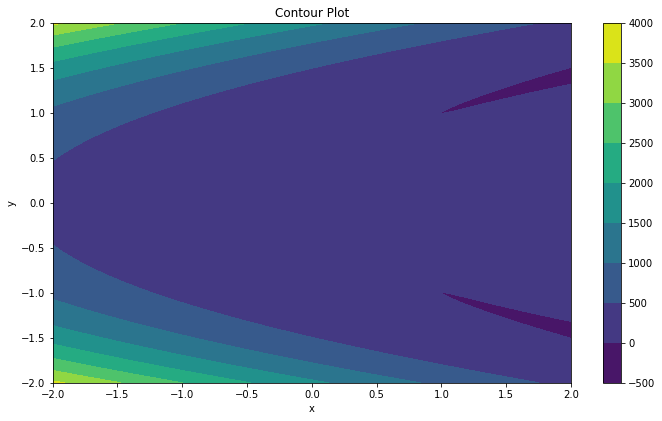

In [4]:
#Define figure size
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = .2, .2, 1.5, 1
ax = fig.add_axes([left, bottom, width, height]) 

# Set x, y axis range
start, stop, n_values = -2, 2, 800

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

# Set z
Z = (1 - X**3) + 100 * (Y**2 - X)**2

# Plot
cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)

# Add plot axis
ax.set_title('Contour Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

2.3 Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [5]:
# Define gradient descent function
def grad_fx(x, y):
    dx = -3 * x**2 - 200 * (y**2 - x)
    dy = 400 * y * (y**2 - x)
    return np.array([dx, dy])

def grad_descent(x, y, iterations, learning_rate):
    # Store initial point
    initial_point = np.array([x, y])
    results = [initial_point]
    
    # Store calculated points
    point = np.array([x, y])
    for i in range(iterations):
        
        grad = grad_fx(x, y)
        point = point - learning_rate * grad
        x, y = point
        results.append(point)
    return np.array(results)

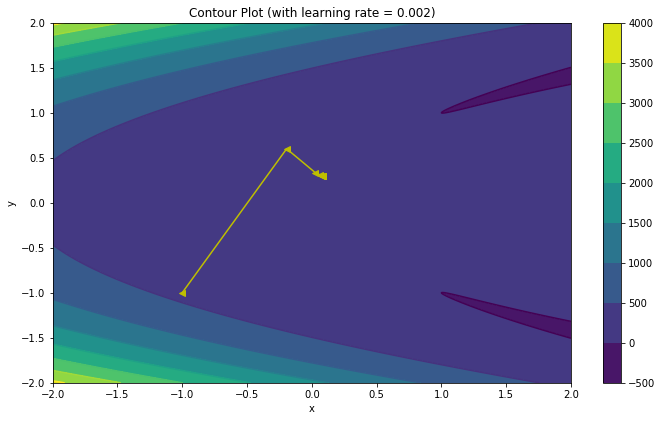

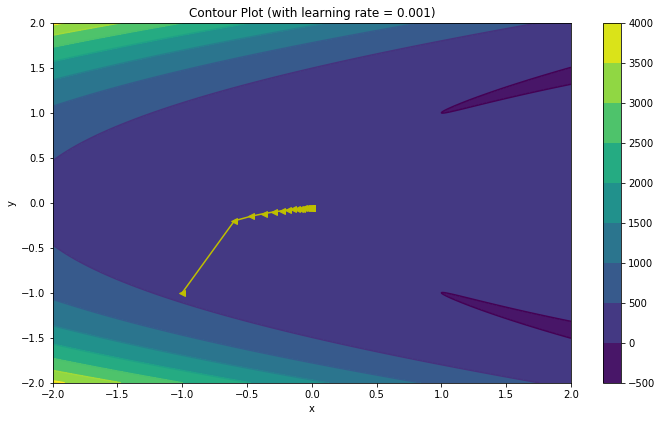

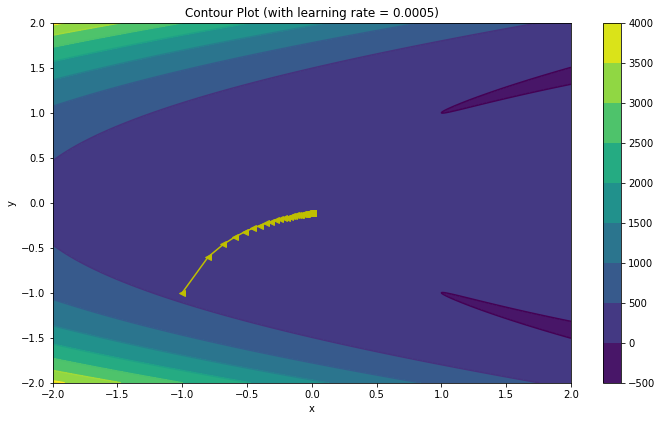

In [6]:
# Set learning rates
learning_rate = [0.002, 0.001, 0.0005]

# Get results from gradient descent
for i in learning_rate:
    results = grad_descent(-1, -1, 100, i)

    # Set figure size
    fig = plt.figure(figsize=(6,5))
    left, bottom, width, height = .2, .2, 1.5, 1
    ax = fig.add_axes([left, bottom, width, height]) 

    cp = plt.contourf(X, Y, Z)
    plt.colorbar(cp)

    # Add plot axis
    ax.set_title('Contour Plot (with learning rate = ' + str(i) + ')')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    #lt.show()


    CS = ax.contour(X, Y, Z)
    x= results[:,0]
    y= results[:,1]
    plt.plot(x, y, 'y-<')

2.4 Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [7]:
def grad_desc_mom(x, y, iterations, alpha, epsilon):

    # Set initial point
    initial_point = np.array([x, y])
    results = [initial_point]
    
    # Store momentum
    point = np.array([x, y])
    velocity_vec = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_fx(x, y)
        velocity_vec = alpha * velocity_vec + epsilon * grad
        point = point - velocity_vec
        x, y = point
        
        results.append(point)
    return np.array(results)

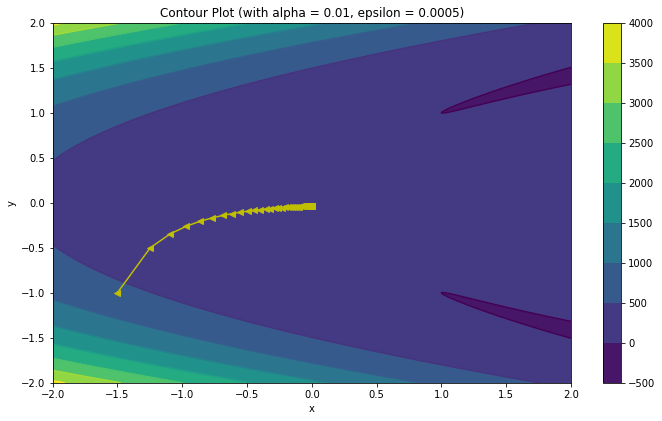

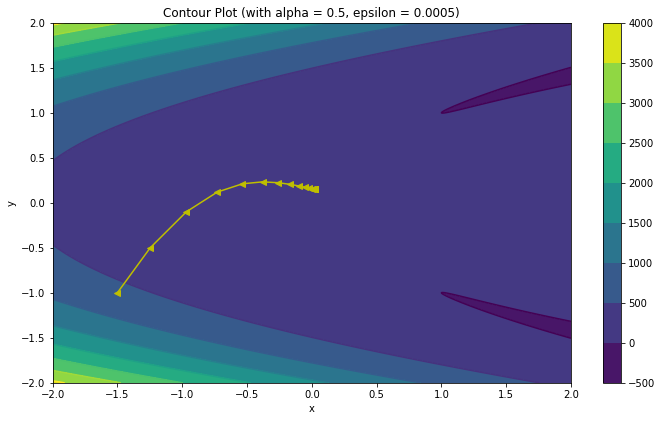

In [8]:
# Set alpha and epsilon rates
alpha_rate = [0.01, 0.5]
epsilon_rate = [0.0005, 0.001]

# Get results from gradient descent
for i in alpha_rate:
    results = grad_desc_mom(-1.5, -1, 100, i, epsilon_rate[0])

    # Set figure size
    fig = plt.figure(figsize=(6,5))
    left, bottom, width, height = .2, .2, 1.5, 1
    ax = fig.add_axes([left, bottom, width, height]) 

    cp = plt.contourf(X, Y, Z)
    plt.colorbar(cp)

    # Add plot axis
    ax.set_title('Contour Plot (with alpha = ' + str(i) + ', epsilon = ' + str(epsilon_rate[0]) + ')')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    #lt.show()


    CS = ax.contour(X, Y, Z)
    x= results[:,0]
    y= results[:,1]
    plt.plot(x, y, 'y-<')

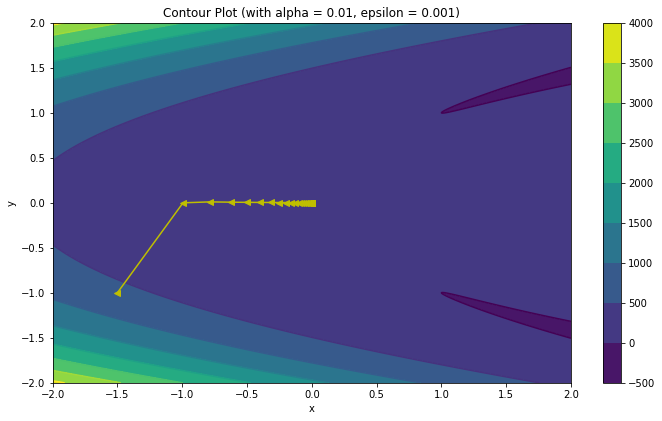

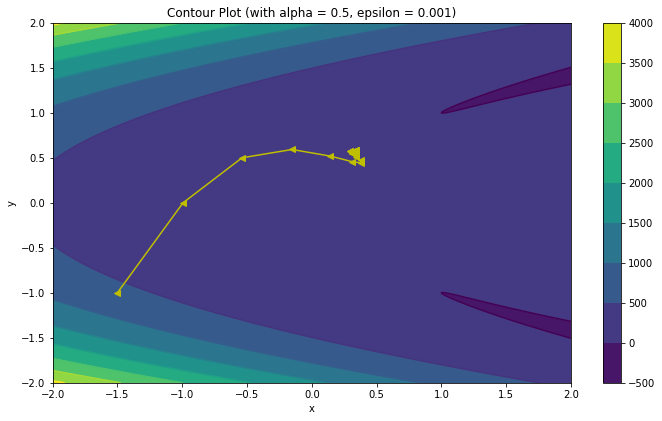

In [9]:
# Get results from gradient descent
for i in alpha_rate:
    results = grad_desc_mom(-1.5, -1, 100, i, epsilon_rate[1])

    # Set figure size
    fig = plt.figure(figsize=(6,5))
    left, bottom, width, height = .2, .2, 1.5, 1
    ax = fig.add_axes([left, bottom, width, height]) 

    cp = plt.contourf(X, Y, Z)
    plt.colorbar(cp)

    # Add plot axis
    ax.set_title('Contour Plot (with alpha = ' + str(i) + ', epsilon = ' + str(epsilon_rate[1]) + ')')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    #lt.show()


    CS = ax.contour(X, Y, Z)
    x= results[:,0]
    y= results[:,1]
    plt.plot(x, y, 'y-<')

## 3 Backprop

3.1 For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

$\hat y$ and Loss function:
$$
\begin{aligned}
\hat y &= \sigma (v_1ReLu(w_{11}x_1 + w_{21}x_2 + b_1) \\
&+ v_2ReLu(w_{12}x_1 + w_{22}x_2 + b_2) \\
&+ v_3ReLu(w_{13}x_1 + w_{23}x_2 + b_3) + c) \\
L &= - y_i log(\hat y_i) - (1 - y_i) log (1 - \hat y_i) \\ \\
\end{aligned}
$$

We have,
$$
\begin{aligned}
\frac{\partial y_{out}}{\partial y_{in}} &= \sigma ( y_{in} ) [\ 1-\sigma (y_{in})] \\
\frac{\partial y_{in}}{\partial h_{out}} &= v_i \\
\frac{\partial h_{out}}{h_{in}} &= \begin{cases} 1 \ if \ h_{in} > 0 \\ 0 \ otherwise \end{cases} \\
\frac{\partial h_{in}}{\partial w_{ij}} &= x_i
\end{aligned}
$$

where, 
$$
\begin{aligned}
y_{in} &= v_1ReLu(w_{11}x_1 + w_{21}x_2 + b_1) + v_2ReLu(w_{12}x_1 + w_{22}x_2 + b_2) + v_3ReLu(w_{13}x_1 + w_{23}x_2 + b_3) + c \\
h_{out} &= ReLU(\ w_{1i} x_1 + w_{2i} x_2 + b_i) \\
h_{in} &= \ w_{1i} x_1 + w_{2i} x_2 + b_i
\end{aligned}
$$


$\frac{\partial L}{\partial y_{out}}$:
$$
\begin{aligned}
\frac{\partial L}{\partial y_{out}} &= \frac{\partial }{\partial \hat y} (- y_i log(\hat y_i) - (1 - y_i) log (1 - \hat y_i)) \\
&= -(\frac{\partial (- y_i log(y_{out}))}{\partial y_{out}} + \frac{\partial ((1 - y_i)log(1 - y_{out}))}{\partial y_{out}}) \\
&= -(\frac{y_i}{\hat y} - \frac{1 - y_i}{1- \hat y}) \\
\end{aligned}
$$

$\frac{\partial L}{\partial c}$:
$$
\begin{aligned}
\frac{\partial L}{\partial c} &=\frac{\partial L}{\partial y_{out}} \frac{\partial y_{out}}{\partial y_{in}} \frac{\partial y_{in}}{\partial c} \\
&= \frac{\partial L}{\partial y_{out}} \frac{\partial y_{out}}{\partial y_{in}} \\
&= -(\frac{y_i}{\hat y} - \frac{1 - y_i}{1- \hat y}) \sigma ( y_{in} ) [\ 1-\sigma (y_{in})] 
\end{aligned}
$$

$\frac{\partial L}{\partial v_i}$:
$$
\begin{aligned}
\frac{\partial L}{\partial v_i} &= \frac{\partial L}{\partial y_{out}} \frac{\partial y_{out}}{\partial y_{in}} \frac{\partial y_{i,in}}{\partial v_k} \\
&= \frac{\partial L}{\partial y_{out}} \frac{\partial y_{out}}{\partial y_{in}} h_{out}\\
&= -(\frac{y_i}{\hat y} - \frac{1 - y_i}{1- \hat y}) \sigma ( y_{in} ) [\ 1-\sigma (y_{in})] h_{out}
\end{aligned}
$$

$\frac{\partial L}{\partial b_i}$:
$$
\begin{aligned}
\frac{\partial L}{\partial b_i} &= \frac{\partial L}{\partial y_{out}} \frac{\partial y_{out}}{\partial y_{in}}\frac{\partial y_{in}}{\partial h_{out}} \frac{\partial h_{out}}{\partial h_{in}} \frac{\partial h_{in}}{\partial b_i}\\
&=  -(\frac{y_i}{{\hat y}_i} - \frac{1 - y_i}{1 - {\hat y}_i})  \sigma(y_{in}) (1 - \sigma(y_{in})) v_i \frac{\partial h_{out}}{\partial h_{in}} \\
\end{aligned}
$$

$\frac{\partial L}{\partial w_ij}$:
$$
\begin{aligned}
\frac{\partial L}{\partial w_{ij}} &= \frac{\partial L}{\partial y_{out}} \frac{\partial y_{out}}{\partial y_{in}} \frac{\partial y_{in}}{\partial h_{out}} \frac{\partial h_{out}}{\partial h_{in}} \frac{\partial h_{in}}{\partial w_{ij}} \\
&= -(\frac{y_i}{{\hat y}_i} - \frac{1 - y_i}{1 - {\hat y}_i})  \sigma(y_{in}) (1 - \sigma(y_{in})) v_i \frac{\partial h_{out}}{\partial h_{in}} x_{i}
\end{aligned}
$$

3.2 Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [10]:
# Define functions
def pack_weights(weight_vec):
    # Load in weights
    w_11, w_12, w_13, w_21, w_22, w_23, b_1, b_2, b_3, v_11, v_12, v_13, c = weight_vec
    
    # Transform individual weights into matrix
    W = np.array([[w_11, w_12, w_13], [w_21, w_22, w_23]])
    b = np.array([b_1, b_2, b_3])
    V = np.array([v_11, v_12, v_13])
    
    return W, b, V, c

def ReLu_derivative(x):
    return np.where(x>0, 1, 0)


def sigmoid_derivative(h):
    return sigmoid(h) * (1 - sigmoid(h))


def binary_entropy_deriv(y, y_hat):
    return -(y/y_hat - (1-y)/(1-y_hat))


def yhat(x, W, b, V, c):
    # returns model prediction 
    h_in = x.dot(W) + b
    h_out = ReLu(h_in)
    y_in = h_out.dot(V) + c
    y_hat = sigmoid(y_in)
    return y_hat


# Define grad_f 
def grad_f(weight_vec, x, y):
    # Load weight matrix
    W, b, V, c = pack_weights(weight_vec)
    
    V_T = np.reshape(V, (1,3))
    
    # Calculate h_in, h_out and y_hat
    h_in = x.dot(W) + b
    h_out = ReLu(h_in)
    y_in = h_out.dot(V) + c
    y_hat = sigmoid(y_in)

    # Calculate binary cross entropy
    dL_dyin = binary_entropy_deriv(y, y_hat) * sigmoid_derivative(y_in) 
    dL_dyin_new = np.reshape(dL_dyin, (500,1))
    
    # Calculate gradient
    d_v =  h_out.T.dot(dL_dyin_new)
    d_c = dL_dyin.sum(axis = 0)
    d_b = (dL_dyin_new.dot(V_T)*(h_out > 0)).sum(axis = 0)
    d_W = x.T.dot(dL_dyin_new.dot(V_T) * (h_out > 0))
    
    # Store the gradient
    w_11, w_12, w_13, w_21, w_22, w_23 = d_W[0, 0], d_W[0, 1], d_W[0, 2], d_W[1, 0], d_W[1, 1], d_W[1, 2]
    b_1, b_2, b_3 = d_b[0], d_b[1], d_b[2]
    v_11, v_12, v_13 =  d_v[0], d_v[1], d_v[2]
    
    return np.array([w_11, w_12, w_13, w_21, w_22, w_23, b_1, b_2, b_3, v_11, v_12, v_13, c])

3.3 Generate a synthetic dataset like the XOR pattern (see below).

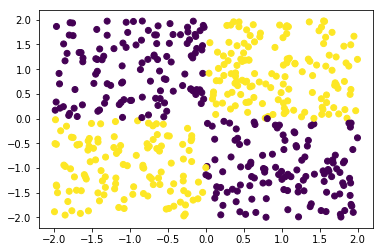

In [11]:
# Generate random numbers from -2 to 2 and reshape data and create empty y values
x = np.random.uniform(low = -2, high = 2, size = 1000).reshape((500, 2))
y = np.zeros(500)

# Assign y value based on class
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1

plt.scatter(x[:,0], x[:,1], c = y)

3.4 Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [12]:
# Define loss function
def loss(y, y_hat):
    # cross entropy
    tot = -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat) 
    return  tot.sum()

# Redefine grad_descent function by adding loss
def grad_descent_new(x, y, iterations, learning_rate):
    # Store initial weights
    initial_weights = np.random.uniform(-.1, .1, size = 13)
    results = [initial_weights]
    losses = [loss(y, yhat(x, *pack_weights(initial_weights)))]
    
    # Store calculated points
    weights = initial_weights
    for i in range(iterations):
        
        grad = grad_f(weights, x, y)
        weights = weights - learning_rate * grad
        
        results.append(weights)
        losses.append(loss(y, yhat(x, *pack_weights(weights))))
    
    return np.array(results), losses

Text(0,0.5,'Total Loss')

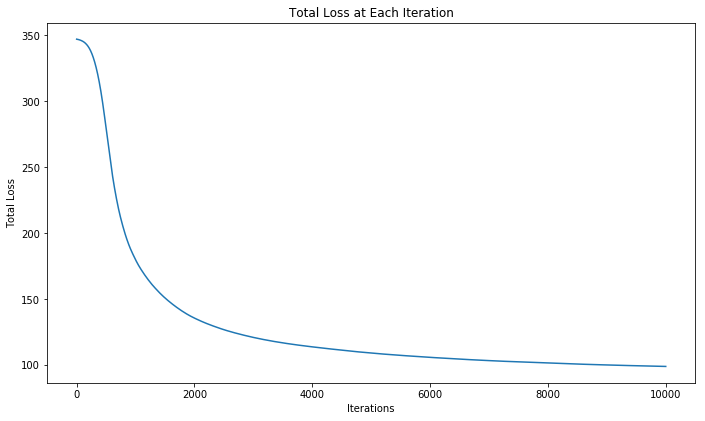

In [13]:
np.random.seed(100)
# Try different parameters
results, losses = grad_descent_new(x, y, 10000, 0.0001)

# Plot total loss at each iteration
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = .2, .2, 1.5, 1
ax = fig.add_axes([left, bottom, width, height]) 

ax.plot(losses)
ax.set_title('Total Loss at Each Iteration')
ax.set_xlabel('Iterations')
ax.set_ylabel('Total Loss')


3.5 Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [14]:
# Update grad_desc_mom by adding loss
def grad_desc_mom_new(x, y, iterations, alpha, epsilon):

    # Set initial weights
    initial_weights = np.random.uniform(-.1, .1, size = 13)
    results = [initial_weights]
    losses = [loss(y, yhat(x, *pack_weights(initial_weights)))]
        
    # Store momentum
    weights = initial_weights
    velocity_vec = np.zeros(weights.size)
    
    for i in range(iterations):
        grad = grad_f(weights, x, y)
        velocity_vec = alpha * velocity_vec + epsilon * grad
        weights = weights - velocity_vec
        
        results.append(weights)
        losses.append(loss(y, yhat(x, *pack_weights(weights))))
    return np.array(results), losses

Text(0,0.5,'Total Loss')

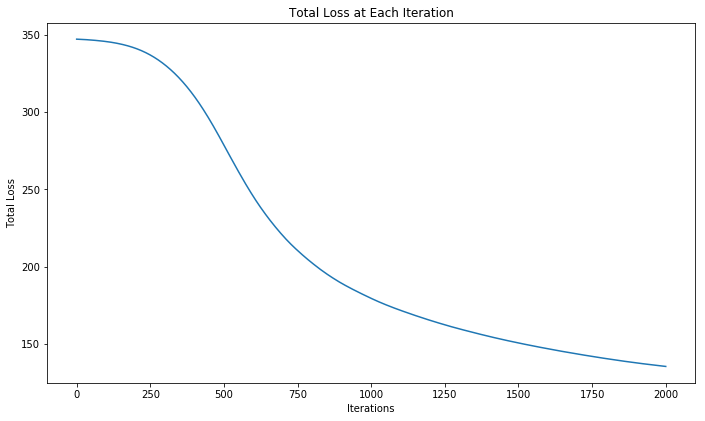

In [15]:
np.random.seed(100)

# Try  parameters
results_mom, losses_mom = grad_desc_mom_new(x, y, 2000, 0.005, 0.0001)

# Plot total loss at each iteration
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = .2, .2, 1.5, 1
ax = fig.add_axes([left, bottom, width, height]) 

ax.plot(losses_mom)
ax.set_title('Total Loss at Each Iteration')
ax.set_xlabel('Iterations')
ax.set_ylabel('Total Loss')

By adding momentum, the algorithm clearly converges more efficiently (much less iterations used).

3.6 Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

In [16]:
# Find an optimum weight matrix
W_opt, b_opt, V_opt, c_opt = pack_weights(results[10000])

# create a mesh to plot in
h = .02
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

xy_mesh = np.c_[xx.ravel(), yy.ravel()]

In [17]:
# Find the decisions
z_output = yhat(xy_mesh, W_opt, b_opt, V_opt, c_opt)
z_class = np.array([1 if i > 0.5 else 0 for i in z_output]).reshape(xx.shape)

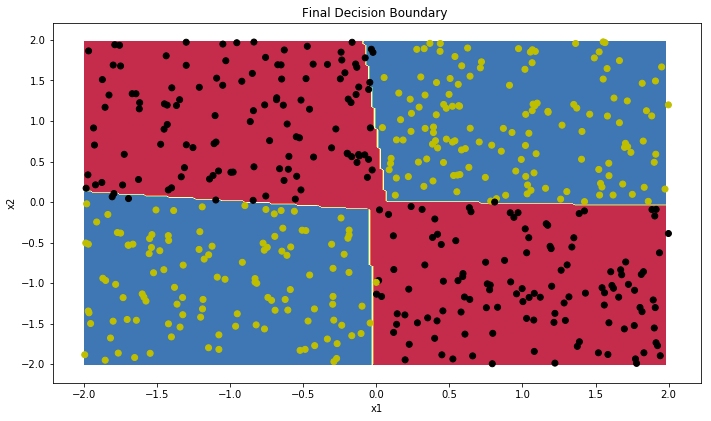

In [18]:
# Plot the contour and training examples
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = .2, .2, 1.5, 1
ax = fig.add_axes([left, bottom, width, height]) 

plt.contourf(xx, yy, z_class, cmap = plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('Final Decision Boundary ')
plt.scatter(x[:,0], x[:,1], c = ['y' if i == 1 else 'black' for i in y])
plt.show()

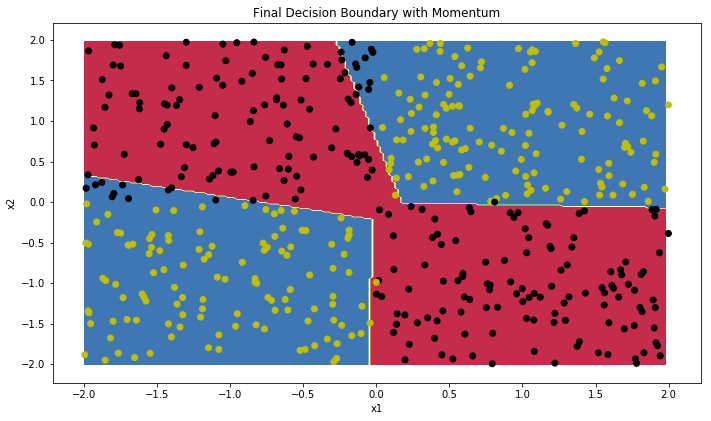

In [19]:
# Find an optimum weight matrix
W_opt2, b_opt2, V_opt2, c_opt2 = pack_weights(results_mom[2000])

# Find the decisions
z_output2 = yhat(xy_mesh, W_opt2, b_opt2, V_opt2, c_opt2)
z_class2 = np.array([1 if i > 0.5 else 0 for i in z_output2]).reshape(xx.shape)

# Plot the contour and training examples
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = .2, .2, 1.5, 1
ax = fig.add_axes([left, bottom, width, height]) 

plt.contourf(xx, yy, z_class2, cmap = plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('Final Decision Boundary with Momentum')
plt.scatter(x[:,0], x[:,1], c = ['y' if i == 1 else 'black' for i in y])
plt.show()